<div style="color:#00BFFF">

# Nowcasting Consumer Expenditure: 

<div style="color:#00BFFF">

### Introduction:  Uncovering Reliable Proxies for Consumer Spending Behaviour. 

**1.1. Introduction: The Problem (Why)**

The current quarterly GDP reports lag in reflecting the dynamic changes in the economy, impacting decision-makers who rely on timely economic data. This project is devised to mitigate this issue by identifying high-frequency, readily updated data proxies that offer quicker insights into consumer expenditure patterns.

**1.2. Project Scope and Objectives (What)**

The project's primary objective is to systematically identify, harmonise, and validate high-frequency data sources as proxies for real-time tracking of consumer expenditure in the United States. The goal is to refine these proxies to provide more immediate data on consumer spending habits, thus bridging the gap caused by the delayed reporting of official GDP figures.

**Key Questions:**

- Which high-frequency data sources can serve as accurate proxies for consumer spending?
- How can we validate these proxies against established measures of consumer expenditure?
- What techniques can we employ to ensure these proxies offer immediate and reliable insights into current consumer spending trends?
- How will we address potential discrepancies between different data sources in terms of scale, units, or reporting standards?
- Are there any unforeseen challenges in harmonizing data frequencies (monthly vs. quarterly) that could impact the accuracy of our analysis?
- How can we ensure the economic relevance of our findings, beyond statistical correlations?
- What contingency plans do we have for dealing with data anomalies or irregularities that might skew our analysis?

**1.3. Methodology**

The methodology is designed to focus on data preparation and validation:

- **Exploratory Data Analysis (EDA)**: To understand the characteristics and quality of the high-frequency monthly indicators and their initial relationships to consumer spending.
- **Proxy Validation**: To establish a correlation with established measures of consumer spending through statistical analysis, ensuring that the proxies are reliable and relevant.

**1.4. Assumptions**

**Data Quality and Relevance:** We operate under the assumption that the high-frequency data from FRED and other sources accurately reflect current economic trends and consumer sentiments. However, there is an inherent risk of data bias or inaccuracy, which could impact the reliability of our findings.

**Predictive Power and Relevance:** While we aim to identify effective proxies for consumer expenditure, there's a risk that these proxies may not fully capture the complexities of consumer behaviour or may not adapt swiftly to sudden economic shifts.

**External Factors:** The project also assumes a stable economic environment. Sudden external shocks (like global events or policy changes) could significantly affect consumer behaviour, potentially reducing the predictive accuracy of our proxies.  

<div style="color:#00BFFF">

### Setup Environment and import libraries

In [1]:
# Run the imports file
%matplotlib inline

In [2]:
# ------- Standard Library Imports -------
import warnings
from datetime import datetime
from pprint import pprint
from typing import List

# ------- Third-Party Library Imports -------
import pandas as pd
from pandas import NaT
import numpy as np

# Utility and display modules
from IPython.display import display, HTML

# Visualizations
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go

# Remove warnings
warnings.filterwarnings('ignore')

# Set the display options
pd.set_option('display.max_rows', None)  
pd.set_option('display.max_columns', None)  
pd.set_option('display.width', None)  
pd.set_option('display.max_colwidth', None)  

/var/folders/30/bhymp02j1fb47cmvs80_1b4m0000gn/T/ipykernel_42928/2839693654.py:8: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


In [3]:
#load data generated from [1]M1_clean_and_preprocess.ipynb

#open defn
defn = pd.read_csv('./results/fred/fred_indicator_mappings.csv',index_col=0)

#open joined_dataset.csv
joined_dataset = pd.read_csv('./results/merged_data/joined_dataset_transformed.csv', index_col=0,parse_dates=False)

In [4]:
joined_dataset.tail()

,PCE,Real Personal Income,IP Index,IP: Fuels,Capacity Utilization: Manufacturing,Help-Wanted Index for United States,Ratio of Help Wanted/No. Unemployed,Civilian Labor Force,Civilian Employment,Civilian Unemployment Rate,Average Duration of Unemployment (Weeks),Initial Claims,Housing Starts: Total New Privately Owned,New Private Housing Permits (SAAR),Total Business: Inventories to Sales Ratio,M1 Money Stock,M2 Money Stock,Real M2 Money Stock,Total Reserves of Depository Institutions,Commercial and Industrial Loans,Real Estate Loans at All Commercial Banks,Nonrevolving consumer credit to Personal Income,Switzerland / U.S. Foreign Exchange Rate,Japan / U.S. Foreign Exchange Rate,U.S. / U.K. Foreign Exchange Rate,Canada / U.S. Foreign Exchange Rate,"Crude Oil, spliced WTI and Cushing",CPI : All Items,Personal Cons. Expend.: Chain Index,Securities in Bank Credit at All Commercial Banks,Primary_Sector_Employment,Secondary_Sector_Employment,Tertiary_Sector_Employment,Public_Sector_Employment,Avg_Hourly_Earnings_Employment,Avg_weekly_hours_Employment,Output: Consumer_Goods_Index,Output_Materials_Index,IP_Prod_Equipment_Index,IP_Final_Products_Index,Short_Term_Rate_Index,Long_Term_Rate_Index,Spread_Index,Credit_Market_Index,Stock_Market_Performance_Index,Stock_Market_Valuation_Index,Consumer_Spending_Index,Producer_Price_Index,Consumer_Credit_Index,Consumer_Demand_Composite_Index,New_Orders_Index
2022Q3,0.053922,0.039554,0.031574,0.153330,0.063883,NaN,NaN,0.017555,0.026273,-0.06065,-0.284934,-0.150074,-0.255462,-0.294251,0.333390,NaN,NaN,-0.057652,-0.094878,0.104879,0.084280,-0.042539,0.002492,0.091596,-0.201871,0.330313,-1.038032,0.022319,0.026047,NaN,0.040970,0.149644,0.112725,0.028623,0.046360,0.051554,-0.004363,0.011899,0.035029,0.020953,0.461724,0.220179,-0.163544,-0.079116,-0.049724,-0.010560,0.007675,-0.237728,0.014662,-0.014173,0.202910
2022Q4,0.046648,-0.000721,-0.076628,-0.256415,-0.474707,NaN,NaN,0.011160,0.013711,0.00000,-0.094978,0.114914,-0.276316,-0.466115,0.166695,NaN,-0.030726,-0.071940,-0.023573,0.073534,0.105269,0.035005,-0.033519,-0.082234,0.173609,0.151882,-0.265448,0.030207,0.032885,NaN,0.110472,0.104019,0.051814,0.021186,0.057934,-0.579069,-0.025620,-0.147467,-0.071431,-0.030432,0.339752,0.095887,-0.803614,-0.273072,0.055133,0.046424,0.005536,-0.097007,0.036733,-0.048428,0.326940
2023Q1,0.070653,0.037935,0.044038,0.083194,0.133974,NaN,NaN,0.054104,0.051466,0.00000,0.000000,0.179517,0.059955,0.072912,0.083348,NaN,-0.088843,-0.141323,0.147794,-0.015318,0.042929,-0.113842,-0.004903,-0.012287,-0.008479,0.060506,-0.107266,0.034730,0.037592,-0.109841,0.046823,0.024860,0.076296,0.052738,0.052988,0.098681,-0.001169,0.105995,0.009818,-0.003967,0.107921,0.010941,-0.401831,-0.034648,0.079464,0.059455,0.024802,-0.126471,0.033787,-0.005528,-0.239927
2023Q2,0.029936,0.005394,-0.013462,0.029509,-0.048231,NaN,-0.393657,0.009913,0.006079,0.06065,0.162819,0.084327,0.099057,0.010416,0.000000,NaN,-0.003960,-0.033318,0.007042,-0.041770,0.016582,-0.049058,-0.020176,0.075595,0.098715,-0.245111,-0.102853,0.025056,0.021976,-0.122843,0.049017,0.046202,0.032279,0.018706,0.048767,0.144420,-0.038621,0.002687,-0.000748,-0.022393,0.123578,0.079470,-0.085145,-0.049476,0.398264,0.093953,0.011375,-0.049392,0.069069,0.000752,1.230694
2023Q3,0.052198,0.004654,0.038788,0.109389,0.033638,0.10177,-0.163162,0.028683,0.018439,0.12130,0.094978,-0.262702,-0.161619,0.078120,-0.333390,NaN,-0.018255,-0.070817,-0.025431,0.001760,0.032889,-0.136982,-0.000643,0.063736,-0.049660,0.151265,0.651061,0.044861,0.033266,-0.081312,0.014632,0.037373,0.064328,0.046202,0.047475,-0.092867,0.063920,0.031130,0.014719,0.035022,0.055409,0.148903,0.022835,0.117667,0.063563,NaN,0.020181,0.134264,0.043464,0.096264,-0.161658


<div style="color:#00BFFF">

### Exploratory Data Analysis (EDA)

<div style="color:#00BFFF">

#### Create data frame to hold most positively and negatively correlated indicators

In [5]:
def calculate_sorted_correlations(dataset, target_column):
    """
    Calculate Pearson correlations of all columns in the dataset with a target column,
    sort them by the absolute value of the correlation, and return as a Series while retaining
    the original positive or negative signs.

    :param dataset: Pandas DataFrame containing the data
    :param target_column: String, the name of the column to correlate with
    :return: Pandas Series with sorted correlations
    """
    # Ensure the index is in datetime format
    dataset.index = pd.to_datetime(dataset.index)

    # Calculate Pearson correlation with target column
    correlation_with_target = dataset.corrwith(dataset[target_column],method='pearson')

    # Sort the correlations by absolute value, but retain the original values
    sorted_correlations = correlation_with_target.reindex(correlation_with_target.abs().sort_values(ascending=False).index)

    # Return the sorted correlations as a Series
    return sorted_correlations

# Initial calculation
top_correlations = calculate_sorted_correlations(joined_dataset, 'PCE')
top_correlations.head(10)

PCE                                          1.000000
Civilian Employment                          0.736795
Tertiary_Sector_Employment                   0.656029
Public_Sector_Employment                     0.530776
CPI : All Items                              0.522975
Ratio of Help Wanted/No. Unemployed          0.514498
Total Reserves of Depository Institutions   -0.514252
Commercial and Industrial Loans             -0.509523
Personal Cons. Expend.: Chain Index          0.483361
Real M2 Money Stock                         -0.477748
dtype: float64

<div style="color:#00BFFF">

#### Interactive overlaid temporal line graph

</div>

In [6]:
## this will also be used to iterate back to the log transformation to possibly correct indicators.

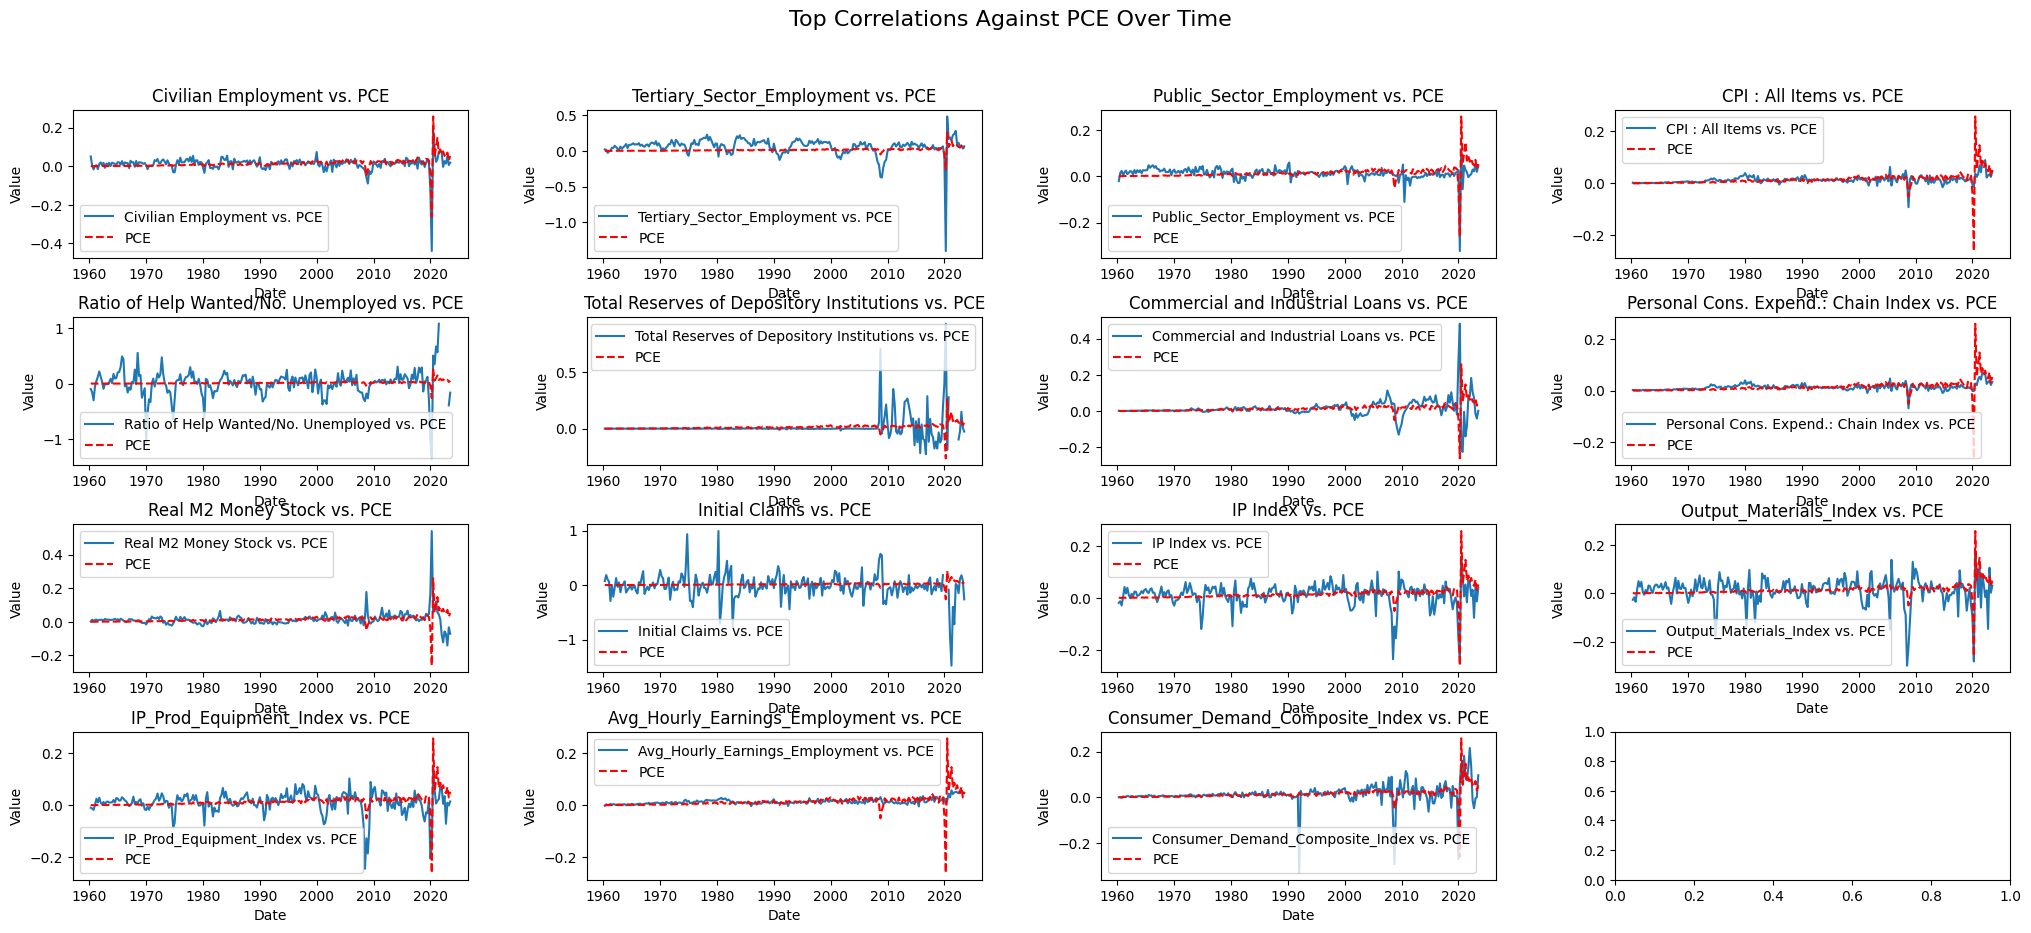

In [7]:
%matplotlib inline
import matplotlib.pyplot as plt


# Assuming `joined_dataset` is your DataFrame that contains the data for PCE and other indicators
# Extract the top 10 correlated features excluding 'PCE'
top_features = [feature for feature in top_correlations.index[:16] if feature != 'PCE']

# Setup the figure and subplots
fig, axs = plt.subplots(4, 4, figsize=(25, 10))  # Adjust figsize as needed
fig.subplots_adjust(hspace=0.4, wspace=0.3)  # Adjust spacing as needed

# Flatten the axes array for easy iteration
axs = axs.flatten()

# Plot each feature in its subplot against PCE
for i, feature in enumerate(top_features):
    # Plotting feature against PCE
    axs[i].plot(joined_dataset.index, joined_dataset[feature], label=f'{feature} vs. PCE')
    axs[i].plot(joined_dataset.index, joined_dataset['PCE'], label='PCE', linestyle='--', color='red')
    axs[i].set_title(f'{feature} vs. PCE')
    axs[i].set_xlabel('Date')  # Adjust as per your dataset structure
    axs[i].set_ylabel('Value')
    axs[i].legend()

# Ensure we only use the subplots needed for the top features
for j in range(i + 1, 10):
    fig.delaxes(axs[j])

# Add an overall title
fig.suptitle('Top Correlations Against PCE Over Time', fontsize=16)

# Show the plot
plt.show()


<div style="color:#00BFFF">

#### Descriptive statistics

</div>

In [8]:
# Descriptive statistics for the joined_dataset
# joined_dataset[top_bottom_20.index].describe()

<div style="color:#00BFFF">

### Comparative and Temporal Analysis

</div>

Undertaken after correlation analysis to delve deeper into the dynamics of the relationships between consumer spending and the identified proxies, providing insights into potential causative or predictive trends.

<div style="color:#00BFFF">

##### Inspecting for multicolinearity: Displaying Correlations heatmap and Testing for multicolinearity


When using multiple indicators, there's a risk of multicollinearity, where indicators are highly correlated with each other. This can distort the importance of individual variables in a regression model.

Inspecting a correlation matrix or heatmap can visually reveal if any two variables are highly correlated, which might suggest multicollinearity.

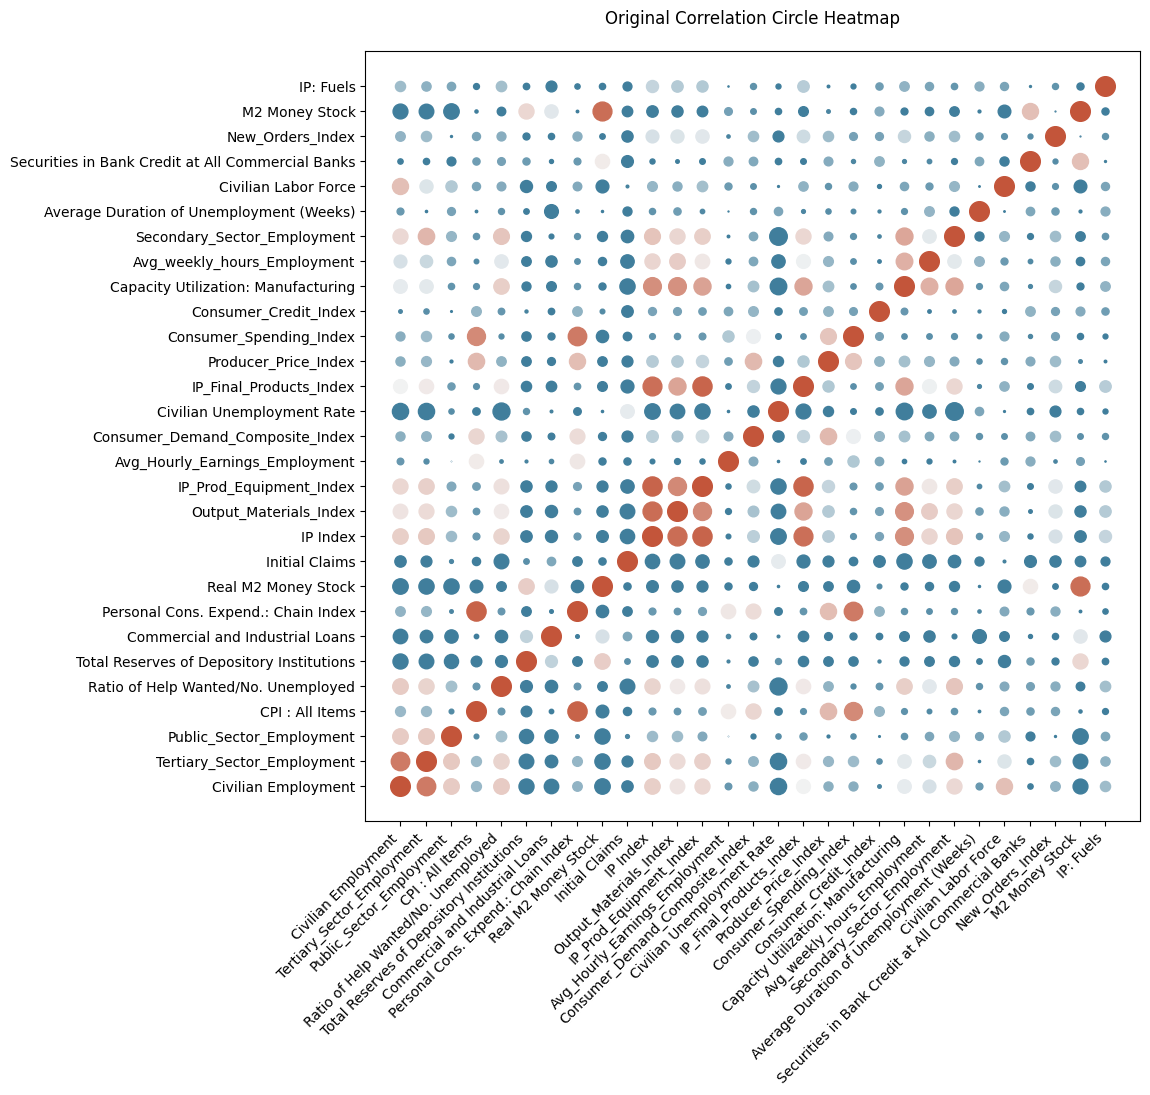

In [9]:
def plot_correlation_circle_heatmap(dataset, correlations, top_n=30, fig_title='Correlation Circle Heatmap'):
    """
    Plots a correlation circle heatmap for the top N indicators based on provided correlations.

    :param dataset: Pandas DataFrame containing the data.
    :param correlations: Pandas Series containing correlation values with index as indicators.
    :param top_n: Integer representing the top N indicators to plot.
    :param fig_title: String representing the title of the figure.
    """
    # Get the top N indicators (excluding 'PCE')
    top_indicators = correlations.head(top_n).index.drop('PCE')

    # Create a correlation matrix for the top N indicators
    correlation_matrix = dataset[top_indicators].corr()

    # Set up the matplotlib figure
    fig, ax = plt.subplots(figsize=(10, 10))

    # Generate a colormap
    cmap = sns.diverging_palette(230, 20, as_cmap=True)

    # Get the coordinates
    x_coords, y_coords = np.meshgrid(correlation_matrix.columns, correlation_matrix.index)

    # Get correlation values for size - scaled for visibility
    sizes = np.abs(correlation_matrix.values.flatten()) * 200

    # Get colors based on correlation values
    colors = [cmap(val) for val in correlation_matrix.values.flatten()]

    # Create the bubble heatmap
    for (x, y), size, color in zip(np.c_[x_coords.ravel(), y_coords.ravel()], sizes, colors):
        ax.scatter(x, y, s=size, c=[color])

    # Improve layout
    ax.set_xticks(np.arange(len(correlation_matrix.columns)))
    ax.set_yticks(np.arange(len(correlation_matrix.index)))
    ax.set_xticklabels(correlation_matrix.columns)
    ax.set_yticklabels(correlation_matrix.index)
    plt.xticks(rotation=45, ha='right')
    plt.yticks(rotation=0)
    ax.set_title(fig_title, pad=20)

    plt.show()
    
# Example usage with the original correlations
plot_correlation_circle_heatmap(joined_dataset, top_correlations, top_n=30, fig_title='Original Correlation Circle Heatmap')



In [10]:
refined_dataset = joined_dataset.copy()

#update the top_bottom_cor_refined
top_correlations_refined = calculate_sorted_correlations(refined_dataset, 'PCE')

top_correlations_refined.head(10)


PCE                                          1.000000
Civilian Employment                          0.736795
Tertiary_Sector_Employment                   0.656029
Public_Sector_Employment                     0.530776
CPI : All Items                              0.522975
Ratio of Help Wanted/No. Unemployed          0.514498
Total Reserves of Depository Institutions   -0.514252
Commercial and Industrial Loans             -0.509523
Personal Cons. Expend.: Chain Index          0.483361
Real M2 Money Stock                         -0.477748
dtype: float64

<div style="color:#00BFFF">

##### Variance Inflation Factor (VIF)


VIF measures how much the variance of an estimated regression coefficient increases if the predictors are correlated. A VIF value greater than 10 is often considered indicative of multicollinearity.

In [11]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

X = joined_dataset.copy()

pce = X['PCE']

# Exclude 'PCE' from VIF calculation but keep it in the dataset
X_without_PCE = X.drop(columns=['PCE']) if 'PCE' in X.columns else X.copy()

# Handle missing (NaN) and infinite (inf) values
X_without_PCE = X_without_PCE.fillna(X_without_PCE.mean())


In [12]:
vif_data = pd.DataFrame()
vif_data["feature"] = X_without_PCE.columns
vif_data["VIF"] = [variance_inflation_factor(X_without_PCE.values, i) for i in range(X_without_PCE.shape[1])]
vif_data = vif_data.sort_values(by='VIF', ascending=False)
print(vif_data)


                                              feature        VIF
1                                            IP Index  74.844041
38                            IP_Final_Products_Index  68.090385
27                Personal Cons. Expend.: Chain Index  55.011603
37                            IP_Prod_Equipment_Index  42.672134
26                                    CPI : All Items  40.758982
15                                     M2 Money Stock  37.414339
7                                 Civilian Employment  30.556037
16                                Real M2 Money Stock  26.221552
36                             Output_Materials_Index  24.223732
39                              Short_Term_Rate_Index  16.328612
31                         Tertiary_Sector_Employment  15.634768
40                               Long_Term_Rate_Index  15.333181
45                            Consumer_Spending_Index  14.814124
35                       Output: Consumer_Goods_Index  12.631620
3                 Capacit

In [13]:


ignored_columns = ["Civilian Unemployment Rate","Civilian Employment",
                   "Housing Starts: Total New Privately Owned","Civilian Labor Force","CPI_Index","IP Index",
                   'Personal Cons. Expend.: Chain Index']  # Add any other columns you want to ignore in this list

while True:
    # Calculate VIF for features not in the ignored list
    vif_data = pd.DataFrame()
    vif_data["feature"] = [column for column in X_without_PCE.columns if column not in ignored_columns]
    vif_data["VIF"] = [variance_inflation_factor(X_without_PCE[vif_data["feature"]].values, i) for i in range(len(vif_data["feature"]))]

    # Find and drop the variable with the highest VIF if it's not in the ignored list
    max_vif = vif_data["VIF"].max()
    if max_vif > 20:  
        feature_to_drop = vif_data.sort_values("VIF", ascending=False).iloc[0]["feature"]
        if feature_to_drop not in ignored_columns:
            X_without_PCE.drop(columns=[feature_to_drop], inplace=True)
            print(f"Dropping {feature_to_drop} with VIF: {max_vif}")
        else:
            # If the top VIF feature is in the ignore list, remove it from the VIF dataframe and continue
            vif_data = vif_data[vif_data["feature"] != feature_to_drop]
    else:
        break



Dropping IP_Final_Products_Index with VIF: 50.031287822242376
Dropping M2 Money Stock with VIF: 35.73312981738319


<div style="color:#00BFFF">

##### Lead and Lag Analysis

**Time Lag Analysis**:
   - **Cross-Correlation**: Examine the cross-correlation function (CCF) between 'PCE' and other indicators to identify potential lead-lag relationships.

- **Technique**: Analysing the time-shifted relationships between consumer spending and the proxies to identify if any indicators consistently lead or lag behind consumer spending patterns.
- **Objective**: To discover predictive relationships where certain proxies might signal changes in consumer spending ahead of time or respond with a delay. *While relevant, the Lead and Lag Analysis could become complex and time-consuming. We need to ensure that it directly contributes to the goal of identifying proxies.*

In [14]:
def lead_lag_analysis(dataset, target_column, variable_list, max_lag=3):
    """
    Perform lead and lag analysis for specified variables against a target column.
    
    :param dataset: Pandas DataFrame
    :param target_column: Column name of the target variable
    :param variable_list: List of column names to analyze
    :param max_lag: Maximum number of periods for lead/lag
    :return: DataFrame with correlation results
    """
    results = []

    for variable in variable_list:
        for lag in range(-max_lag, max_lag + 1):
            if lag == 0:
                # Contemporaneous correlation
                corr = dataset[variable].corr(dataset[target_column])
            else:
                # Lead/Lag correlation
                shifted = dataset[variable].shift(-lag)
                corr = shifted.corr(dataset[target_column])

            results.append({'Variable': variable, 'Lag': lag, 'Correlation': corr})

    return pd.DataFrame(results)

# Choose variables (excluding 'PCE')
variables_to_analyze = refined_dataset.columns.drop('PCE')

# Perform lead and lag analysis
lead_lag_results = lead_lag_analysis(refined_dataset, 'PCE', variables_to_analyze, max_lag=4)

# Display the results
print(lead_lag_results.sort_values(by='Correlation', ascending=False))


                                              Variable  Lag  Correlation
67                                 Civilian Employment    0     0.736795
283                         Tertiary_Sector_Employment    0     0.656029
187    Nonrevolving consumer credit to Personal Income    3     0.629856
390                     Stock_Market_Performance_Index   -1     0.552249
435                    Consumer_Demand_Composite_Index   -1     0.548038
292                           Public_Sector_Employment    0     0.530776
238                                    CPI : All Items    0     0.522975
49                 Ratio of Help Wanted/No. Unemployed    0     0.514498
247                Personal Cons. Expend.: Chain Index    0     0.483361
138                                     M2 Money Stock   -1     0.478172
302                     Avg_Hourly_Earnings_Employment    1     0.471016
13                                            IP Index    0     0.469303
254  Securities in Bank Credit at All Commercial Ba

In [15]:

# Filter for indicators with a lag of 1 and high correlation
filtered_results = lead_lag_results[lead_lag_results['Lag'].between(0,1)] 

# Sort by correlation strength
filtered_results = filtered_results.sort_values(by='Correlation', ascending=False)

filtered_results.head(10)

,Variable,Lag,Correlation
67,Civilian Employment,0,0.736795
283,Tertiary_Sector_Employment,0,0.656029
292,Public_Sector_Employment,0,0.530776
238,CPI : All Items,0,0.522975
49,Ratio of Help Wanted/No. Unemployed,0,0.514498
247,Personal Cons. Expend.: Chain Index,0,0.483361
302,Avg_Hourly_Earnings_Employment,1,0.471016
13,IP Index,0,0.469303
328,Output_Materials_Index,0,0.422192
337,IP_Prod_Equipment_Index,0,0.415590


In [16]:
# Extract variable names from the filtered results
variables_for_nowcasting = filtered_results['Variable'].unique().tolist()

# Ensure 'PCE' is included in the list
if 'PCE' not in variables_for_nowcasting:
    variables_for_nowcasting.append('PCE')

# Filter refined_dataset to include only the selected variables
filtered_refined_dataset = refined_dataset[variables_for_nowcasting]

# Calculate correlations for the selected variables
filtered_top_correlations_refined = calculate_sorted_correlations(filtered_refined_dataset, 'PCE')


# Display the filtered results
print("Filtered Correlation Series:\n", filtered_top_correlations_refined)

Filtered Correlation Series:
 PCE                                                  1.000000
Civilian Employment                                  0.736795
Tertiary_Sector_Employment                           0.656029
Public_Sector_Employment                             0.530776
CPI : All Items                                      0.522975
Ratio of Help Wanted/No. Unemployed                  0.514498
Total Reserves of Depository Institutions           -0.514252
Commercial and Industrial Loans                     -0.509523
Personal Cons. Expend.: Chain Index                  0.483361
Real M2 Money Stock                                 -0.477748
Initial Claims                                      -0.476019
IP Index                                             0.469303
Output_Materials_Index                               0.422192
IP_Prod_Equipment_Index                              0.415590
Avg_Hourly_Earnings_Employment                       0.408022
Consumer_Demand_Composite_Index         

<div style="color:#00BFFF">

### Linear Regression Analysis to Determine Variable Influence on PCE

<div style="color:#00BFFF">

##### Linear Regression Analysis

This section of the notebook conducts a linear regression analysis to explore how different variables in our dataset influence the Private Consumption Expenditure (PCE). The primary goal is to determine the strength of the linear relationship each variable has with PCE, quantified using the \( R^2 \) (coefficient of determination) metric.Variables with higher \( R^2 \) values are of particular interest as they may be key drivers of PCE variations.By understanding these relationships, we can better comprehend the dynamics influencing Private Consumption Expenditure, an essential component of economic analysis.

**Steps in the Analysis:**

1. **Data Preparation:**
   - We exclude 'PCE' from the list of independent variables as it is our dependent variable.
   - The dataset is cleaned to remove any rows with NaN or infinite values to ensure the validity of our regression analysis.

2. **Linear Regression:**
   - For each independent variable, we perform a simple linear regression against 'PCE'.
   - Only variables with a sufficient number of observations (set by `min_threshold`) are considered to ensure robust regression results.

3. **Calculation of \( R^2 \) Values:**
   - After fitting the model, we predict 'PCE' using each independent variable and compute the \( R^2 \) value.
   - The \( R^2 \) value indicates how much of the variance in 'PCE' is explained by the variable. A higher \( R^2 \) suggests a stronger explanatory power.

In [17]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

# Prepare the independent variables (excluding 'PCE')
independent_vars = filtered_refined_dataset.drop(columns=['PCE']).columns

# Prepare the dependent variable 'PCE'
dependent_var = filtered_refined_dataset['PCE']

# Setting a minimum threshold for the number of observations required for regression
min_threshold = 30

# Dictionary to store R^2 values for each variable
r2_values = {}

# Perform linear regression for each independent variable
for var in independent_vars:
    # Drop rows where either the independent or dependent variable is NaN or infinite
    combined_data = filtered_refined_dataset[[var, 'PCE']].replace([np.inf, -np.inf], np.nan)#.dropna()
    
    #replace np.nan with 0
    combined_data = combined_data.fillna(0)

    if len(combined_data) >= min_threshold:
        # Prepare the data for regression
        X = combined_data[var].values.reshape(-1, 1)
        y = combined_data['PCE'].values

        # Create and fit the model
        model = LinearRegression()
        model.fit(X, y)

        # Predict and calculate R^2
        predictions = model.predict(X)
        r2_values[var] = r2_score(y, predictions)

# Sorting the R^2 values
r2_values_sorted = dict(sorted(r2_values.items(), key=lambda item: item[1], reverse=True))

# Assuming 'defn' is a DataFrame as described
groups = defn.set_index('description')['group'].to_dict()

# Displaying the top few R^2 values for brevity
list(r2_values_sorted.items())

[('Civilian Employment', 0.5430742081867486),
 ('Tertiary_Sector_Employment', 0.43079810442215616),
 ('Public_Sector_Employment', 0.2821508740723523),
 ('CPI : All Items', 0.27420540846704333),
 ('Commercial and Industrial Loans', 0.2587383151520396),
 ('Ratio of Help Wanted/No. Unemployed', 0.24122985151129828),
 ('Personal Cons. Expend.: Chain Index', 0.23438237063456058),
 ('Real M2 Money Stock', 0.22734034127812064),
 ('Total Reserves of Depository Institutions', 0.2221340407438731),
 ('IP Index', 0.22046136706033992),
 ('Output_Materials_Index', 0.17837515384068658),
 ('IP_Prod_Equipment_Index', 0.17291307758939845),
 ('Avg_Hourly_Earnings_Employment', 0.1672864589937565),
 ('Consumer_Demand_Composite_Index', 0.14236304046485648),
 ('IP_Final_Products_Index', 0.11439632286993073),
 ('Producer_Price_Index', 0.11202040962402993),
 ('Consumer_Spending_Index', 0.10439198982469644),
 ('Consumer_Credit_Index', 0.09687636152620094),
 ('Capacity Utilization: Manufacturing', 0.095889750425


   - The \( R^2 \) values are sorted in descending order, and the top results are displayed.
   - This ranking helps us identify which variables have the most significant linear relationship with 'PCE'.

<div style="color:#00BFFF">

##### Grouping, Sorting and Displaying Results:

In [18]:
economic_sectors_indicators = {
    'Labor Market': [
        'Primary_Sector_Employment',
        'Secondary_Sector_Employment',
        'Tertiary_Sector_Employment',
        'Public_Sector_Employment',
        'Avg_Hourly_Earnings_Employment',
        'Avg_weekly_hours_Employment'
    ],

    'Output and Income': [
        'Output: Consumer_Goods_Index',
        'Output_Materials_Index',
        'IP_Prod_Equipment_Index',
        'IP_Final_Products_Index'
    ],

    'Interest and Exchange Rates': [
        'Short_Term_Rate_Index',
        'Long_Term_Rate_Index',
        'Spread_Index',
        'Credit_Market_Index'
    ],

    'Stock Market': [
        'Stock_Market_Performance_Index',
        'Stock_Market_Valuation_Index'
    ],

    'Prices': [
        'Consumer_Spending_Index',
        'Producer_Price_Index'
    ],

    'Money and Credit': [
        'Consumer_Credit_Index'
    ],

    'Consumption, Orders, and Inventories': [
        'Consumer_Demand_Composite_Index',
        'New_Orders_Index'
    ]
}


In [19]:
from utils.economic_groups import economic_sectors_indicators

# Mapping the R^2 values to their respective groups
grouped_r2_values = {}
for var, r2 in r2_values.items():
    group = groups.get(var, None)  # Default to None if no group is found
    if group is None:
        # Iterate through economic sectors and check if var is in their indicators
        for sector, indicators in economic_sectors_indicators.items():
            if var in indicators:
                group = sector
                break  # Exit the loop if var is found in a sector
        if group is None:
            group = 'Unknown'  # Default to 'Unknown' if var is not found in any sector
    if group not in grouped_r2_values:
        grouped_r2_values[group] = {}
    grouped_r2_values[group][var] = r2


In [20]:
from plotly.subplots import make_subplots

# Determine the number of groups
num_groups = len(grouped_r2_values)

# Create subplots with shared y-axis
fig = make_subplots(rows=num_groups, cols=1, shared_yaxes=True, subplot_titles=list(grouped_r2_values.keys()))

# Plot each group in a separate subplot with sorted values
for i, (group, values) in enumerate(grouped_r2_values.items(), start=1):
    # Sort the values in descending order
    sorted_values = dict(sorted(values.items(), key=lambda item: item[1], reverse=True))

    fig.add_trace(
        go.Bar(x=list(sorted_values.keys()), y=list(sorted_values.values()), name=group),
        row=i, col=1
    )

# Update layout
fig.update_layout(
    height=800,  # Adjust the height depending on the number of subplots
    title_text=r'$R^2$ - Regression on Individual Factors by Group',
    showlegend=False
)

# Update y-axis label and hide x-axis tick labels
for i in range(1, num_groups + 1):
    fig.update_xaxes(title_text='', showticklabels=False, row=i, col=1)
fig.update_yaxes(title_text=r'R^2 Value', row=num_groups, col=1)

#update subplot y-axis range to all have value 0-1
for i in range(1, num_groups + 1):
    fig.update_yaxes(range=[0, 0.65], row=i, col=1)

# Show the figure
fig.show()


In [21]:
indicators = filtered_top_correlations_refined.drop('PCE')

# Assuming 'r2_values_sorted' and 'top_bottom_cor' are dictionaries or pandas Series
r2_values = pd.Series(r2_values_sorted)
cor_values = indicators #.drop('PCE')  # Exclude PCE as it's a self-correlation

# Merge the two Series into a DataFrame and add groups
comparison_df = pd.DataFrame({'R_squared': r2_values, 'Correlation': cor_values})
comparison_df['Group'] = comparison_df.index.map(groups)

# Create the scatter plot using Plotly
fig = go.Figure()

# Add the scatter plot trace for each group
for group, group_df in comparison_df.groupby('Group'):
    fig.add_trace(
        go.Scatter(
            x=group_df['R_squared'],
            y=group_df['Correlation'],
            mode='markers',
            text=group_df.index,  # This will show up on hover
            marker=dict(
                size=10,
                opacity=0.8,  # Slightly more opaque for better visibility
            ),
            name=group  # This will be the legend entry
        )
    )

# Define the aspect ratio for the figure layout
aspect_ratio = 1.6  # Example aspect ratio, adjust as needed

# Set the layout for the plot
fig.update_layout(
    title='Comparison of R-squared and Correlation Coefficients',
    xaxis_title='R-squared Values',
    yaxis_title='Correlation Coefficients',
    xaxis=dict(showgrid=True, range=[0, 1]),  # Adjust the x-axis range if needed
    yaxis=dict(showgrid=True),
    legend_title="Groups",
    width=800,  # Control the width of the figure
    height=800 / aspect_ratio,  # Control the height based on the aspect ratio
)

# Adjust the legend to not overlap with data
fig.update_layout(legend=dict(
    yanchor="top",
    y=0.99,
    xanchor="right",
    x=0.99
))

# Show the figure
fig.show()

In [22]:
filtered_refined_dataset.to_csv('filtered_refined_dataset.csv')

<div style="color:#00BFFF">

### Proxy Evaluation and Variable Selection

<div style="color:#00BFFF">

##### Choosing Proxies for VAR:


Essential for finalising the selection of proxies, ensuring they are representative of consumer spending trends and robust under different conditions. 

When selecting a subset of indicators for VAR model from the reduced set of variables:

1. **Economic Theory and Relevance**: Choose variables that are theoretically and empirically relevant to "PCE". They should have economic justification for inclusion in the model.

2. **Statistical Significance**: Consider variables that have shown significant coefficients in the linear regression analysis and a strong correlation with "PCE".

3. **Avoid Overfitting**: With VAR models, including too many variables can lead to overfitting and model complexity. Choose a subset that captures the essential dynamics without being overly complex.

4. **Dimensionality Considerations**: Given the complexity of VAR models, especially with lagged terms, it’s prudent to limit the number of variables. From initial set of 123, a significantly reduced subset based on the above criteria would be appropriate.

5. **Diverse Representation**: Ensure that the chosen indicators cover diverse aspects of the economy and are not too closely related to each other, to provide a comprehensive view.

6. **Iterative Approach**: Model building can be an iterative process. Start with a smaller set of key variables and gradually add or remove variables based on model performance and diagnostics.

For constructing a Vector Autoregression (VAR) model, choosing the right number of variables (proxies in your case) is crucial for the model's performance and interpretability. Using too many variables can lead to overfitting and computational complexity, while too few may miss out on important information.

Suggested Approach:
Set Thresholds for Correlation and R-squared:
A correlation threshold (e.g., |Correlation| > 0.5) helps ensure that only variables significantly related to consumer spending (PCE) are included.
An R-squared threshold (e.g., R-squared > 0.25) ensures the variable has decent predictive power.

In [23]:
# Set thresholds
corr_threshold = 0.4
r_squared_threshold = 0.25

# Filter based on the thresholds
filtered_proxies = comparison_df[
    (comparison_df['Correlation'].abs() > corr_threshold) |
    (comparison_df['R_squared'] > r_squared_threshold)]

# Now, 'filtered_proxies' contains variables meeting both criteria
selected_variables = filtered_proxies.index.tolist() # Use 'selected_variables' in VAR model

filtered_proxies

,R_squared,Correlation,Group
Avg_Hourly_Earnings_Employment,0.167286,0.408022,NaN
CPI : All Items,0.274205,0.522975,Prices
Civilian Employment,0.543074,0.736795,Labor Market
Commercial and Industrial Loans,0.258738,-0.509523,Money and Credit
IP Index,0.220461,0.469303,Output and Income
IP_Prod_Equipment_Index,0.172913,0.415590,NaN
Initial Claims,0.080921,-0.476019,Labor Market
Output_Materials_Index,0.178375,0.422192,NaN
Personal Cons. Expend.: Chain Index,0.234382,0.483361,Prices
Public_Sector_Employment,0.282151,0.530776,NaN


In [24]:
# Convert comparison_df.index to a list to ensure compatibility
columns_to_keep = selected_variables+['PCE']

# Filter the columns in final_proxy_dataset_for_validation
final_proxy_dataset_for_validation = filtered_refined_dataset[columns_to_keep]

<div style="color:#00BFFF">

### In Sample Proxy validation with Vector auto regresiion (VAR) model

In [25]:
final_proxy_dataset_for_validation.to_csv('final_proxy_dataset_for_validation.csv')

Accuracy metrics for the test period (2016Q2 - 2016Q3):
MAE: 0.0034
RMSE: 0.0034



<Figure size 1000x600 with 0 Axes>

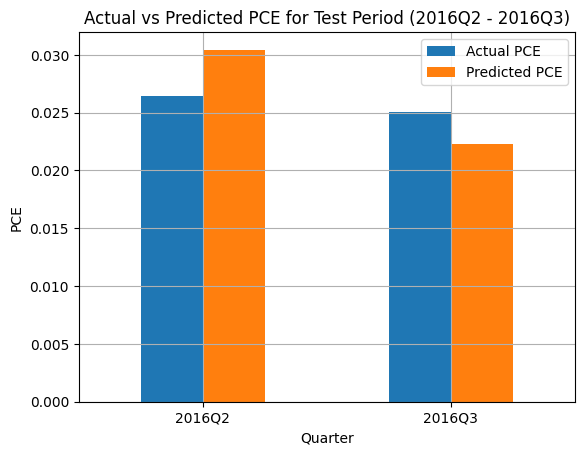

Accuracy metrics for the test period (2016Q3 - 2016Q4):
MAE: 0.0080
RMSE: 0.0086



<Figure size 1000x600 with 0 Axes>

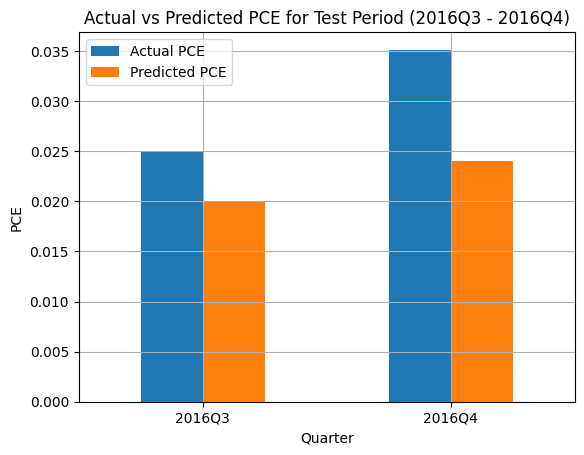

Accuracy metrics for the test period (2016Q4 - 2017Q1):
MAE: 0.0062
RMSE: 0.0065



<Figure size 1000x600 with 0 Axes>

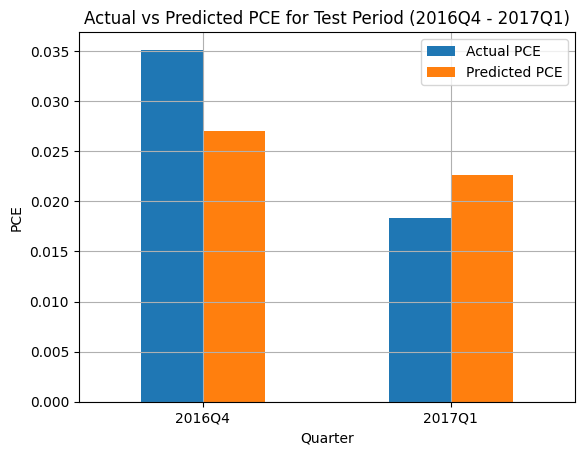

Accuracy metrics for the test period (2017Q1 - 2017Q2):
MAE: 0.0087
RMSE: 0.0087



<Figure size 1000x600 with 0 Axes>

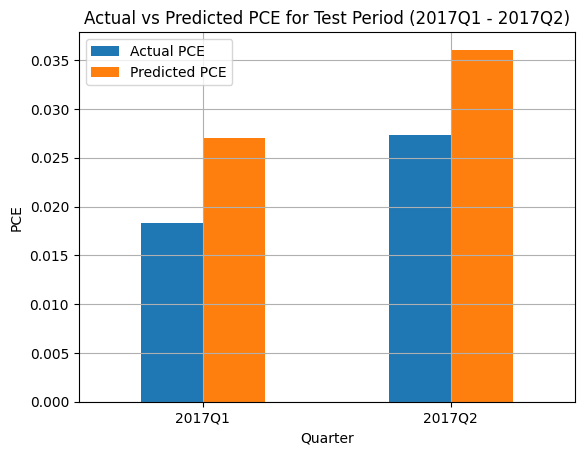

In [26]:
from statsmodels.tsa.api import VAR
import matplotlib.pyplot as plt
from sklearn.metrics import mean_absolute_error, mean_squared_error


# Load dataset
var_df = final_proxy_dataset_for_validation.copy()

# Convert index to datetime and set the frequency to quarterly
var_df.index = pd.to_datetime(var_df.index) - pd.Timedelta(days=1)
var_df.index = var_df.index.to_period('Q')

# Handling Missing Values and Infinities
var_df.replace([np.inf, -np.inf], np.nan, inplace=True)

#drop rows with nan
var_df = var_df.dropna()

# # First, try to interpolate
# var_df.interpolate(method='linear', limit_direction='forward', axis=0, inplace=True)

# # Then use forward fill
# var_df.fillna(method='ffill', inplace=True)

# # Finally, use backward fill as the last resort
# var_df.fillna(method='bfill', inplace=True)

# Define test periods
test_periods = [
    ('2016Q2', '2016Q3'),
    ('2016Q3', '2016Q4'),
    ('2016Q4', '2017Q1'),
    ('2017Q1', '2017Q2'),

]

# Initialize lists to store MAE and RMSE for each test period
mae_list = []
rmse_list = []

# Loop over test periods
for start, end in test_periods:
    # Split the data for training and testing
    train_data = var_df[:start]
    test_data = var_df[start:end]

    # Fit the VAR model and determine the optimal lag order
    model = VAR(train_data)
    num_vars = len(train_data.columns)
    num_obs = len(train_data)
    maxlags_calculated = num_obs // (num_vars * 2)  # Calculate an appropriate maxlags value
    selected_order = model.select_order(maxlags=maxlags_calculated)
    optimal_lag = selected_order.selected_orders['aic']

    # Fitting the VAR model with the optimal lag
    results = model.fit(optimal_lag)

    # Out-of-sample forecast
    forecast = results.forecast(train_data.values[-optimal_lag:], steps=len(test_data))

    # Convert forecast to DataFrame and compare with test_data
    forecast_df = pd.DataFrame(forecast, index=test_data.index, columns=test_data.columns)

    # Extracting actual and predicted values of 'PCE' for comparison
    actual_pce_test = test_data['PCE']
    predicted_pce_test = forecast_df['PCE']

    # Creating a DataFrame for comparison
    comparison_df_test = pd.DataFrame({'Actual PCE': actual_pce_test, 'Predicted PCE': predicted_pce_test})
    
    # Calculate MAE and RMSE
    mae = mean_absolute_error(actual_pce_test, predicted_pce_test)
    rmse = np.sqrt(mean_squared_error(actual_pce_test, predicted_pce_test))

    # Append to the list
    mae_list.append(mae)
    rmse_list.append(rmse)

    # Print accuracy metrics
    print(f"Accuracy metrics for the test period ({start} - {end}):")
    print(f"MAE: {mae:.4f}")
    print(f"RMSE: {rmse:.4f}\n")


    # Plotting the actual vs predicted values for PCE in the test dataset
    plt.figure(figsize=(10, 6))
    comparison_df_test.plot(kind='bar')
    plt.title(f'Actual vs Predicted PCE for Test Period ({start} - {end})')
    plt.ylabel('PCE')
    plt.xlabel('Quarter')
    plt.xticks(rotation=0)
    plt.grid(True)
    plt.show()



In [27]:
from sklearn.metrics import mean_squared_error, mean_absolute_error
import numpy as np

# Evaluate the forecast using MAE and RMSE
for column in forecast_df.columns:
    mae = mean_absolute_error(test_data[column], forecast_df[column])
    rmse = np.sqrt(mean_squared_error(test_data[column], forecast_df[column]))
    print(f"{column} - MAE: {mae:.4f}, RMSE: {rmse:.4f}")

# Extracting actual and predicted values of 'PCE' for comparison
actual_pce_test = test_data['PCE']
predicted_pce_test = forecast_df['PCE']


Avg_Hourly_Earnings_Employment - MAE: 0.0156, RMSE: 0.0205
CPI : All Items - MAE: 0.0108, RMSE: 0.0129
Civilian Employment - MAE: 0.0274, RMSE: 0.0342
Commercial and Industrial Loans - MAE: 0.0294, RMSE: 0.0344
IP Index - MAE: 0.0181, RMSE: 0.0192
IP_Prod_Equipment_Index - MAE: 0.0304, RMSE: 0.0410
Initial Claims - MAE: 0.2322, RMSE: 0.3151
Output_Materials_Index - MAE: 0.0582, RMSE: 0.0743
Personal Cons. Expend.: Chain Index - MAE: 0.0111, RMSE: 0.0112
Public_Sector_Employment - MAE: 0.0164, RMSE: 0.0165
Ratio of Help Wanted/No. Unemployed - MAE: 0.0934, RMSE: 0.0951
Real M2 Money Stock - MAE: 0.0169, RMSE: 0.0204
Tertiary_Sector_Employment - MAE: 0.0311, RMSE: 0.0396
Total Reserves of Depository Institutions - MAE: 0.1440, RMSE: 0.1440
PCE - MAE: 0.0087, RMSE: 0.0087
